Créer un dataset réalisable.

--> ID DE L'ELEVE , Est-t-il venu à la cantine (un jour choisi), Présence de Crudités / Fruits Crus, Présence de Légumes verts / Fruits cuits, Présence de Féculents / Légumes secs, Présence de Charcuteries / Préparations patissières, Présences de Garnitures Frites / Produits reconstitués, Présence de Viandes / Volailles / poissons / Oeufs, Présences de Fromages / Laitages, Présence de Dessert / Pâtisseries.

1er étape : Récuperer des données cohérantes.

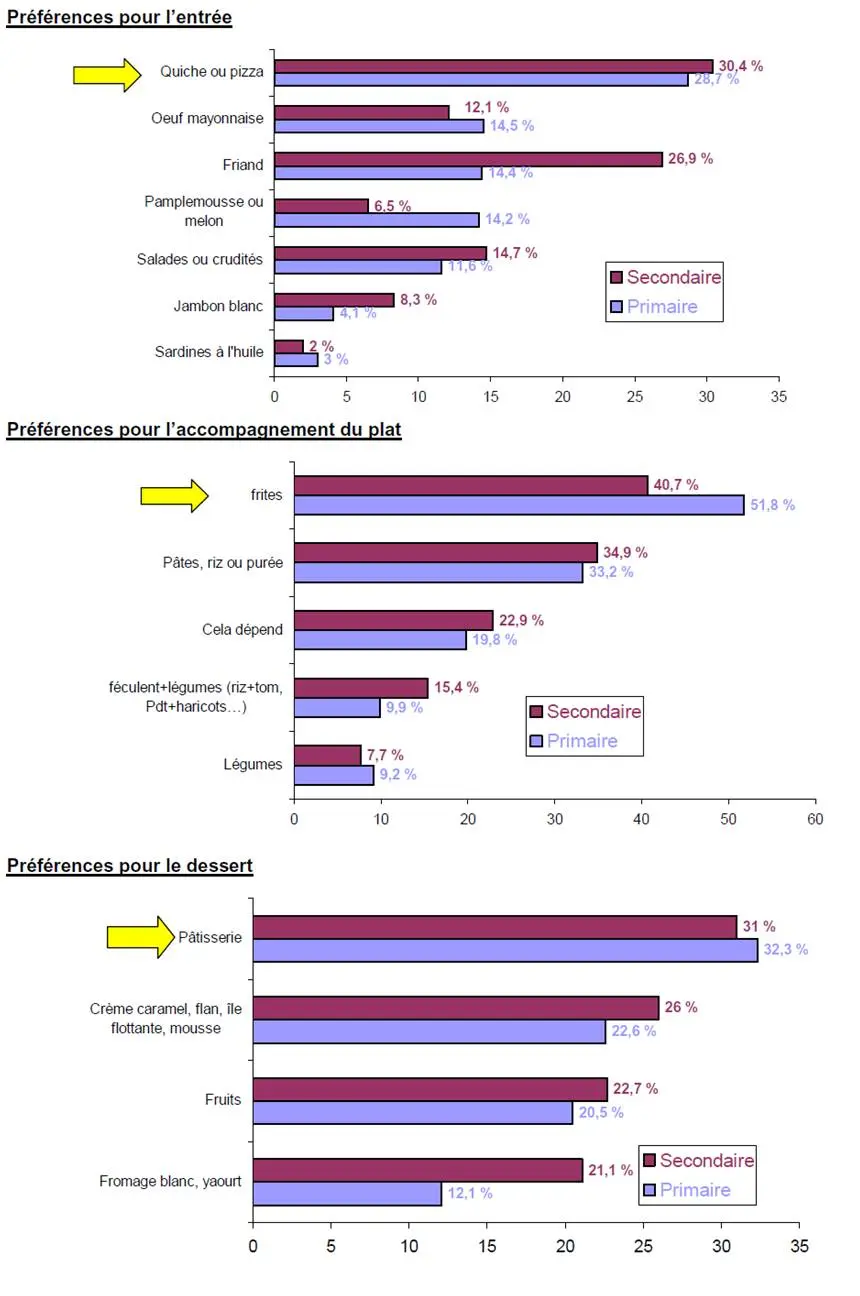

In [1]:
# Pour les données on va utiliser
from IPython.display import Image
Image(filename='output1.png')

2ème étape : Création des élèves avec les données cohérentes

In [20]:
import random
class Eleve:
    compteur = 0
    def __init__(self) -> None:
        self.identifiant = Eleve.compteur
        Eleve.compteur += 1
        aime_crudite = 0
        aime_legume = 0
        aime_feculent = 0
        aime_charcuteries = 0
        aime_garnitures = 0
        aime_viande = 0
        aime_fromage = 0
        aime_dessert = 0

    def get_identifiant(self):
        return self.identifiant
    
    def get_aime_crudite(self):
        if random.random() < 0.147:
            self.aime_crudite = 1
        else:
            self.aime_crudite = 0

    def get_aime_legume(self):
        if random.random() < 0.077:
            self.aime_legume = 1
        else:
            self.aime_legume = 0

    def get_aime_feculent(self):
        if random.random() < 0.154:
            self.aime_feculent = 1
        else:
            self.aime_feculent = 0

    def get_aime_charcuteries(self):
        if random.random() < 0.083:
            self.aime_charcuteries = 1
        else:
            self.aime_charcuteries = 0

    def get_aime_garnitures(self):
        if random.random() < 0.407:
            self.aime_garnitures = 1
        else:
            self.aime_garnitures = 0

    def get_aime_viande(self):
        if random.random() < 0.70:
            self.aime_viande = 1
        else:
            self.aime_viande = 0

    def get_aime_fromage(self):
        if random.random() < 0.021:
            self.aime_fromage = 1
        else:
            self.aime_fromage = 0

    def get_aime_dessert(self):
        if random.random() < 0.50:
            self.aime_dessert = 1
        else:
            self.aime_dessert = 0


Créer un json de 500élèves selon leur préférences

In [21]:
import json


eleves = []


for i in range(500):

    nouvel_eleve = Eleve()

    nouvel_eleve.get_aime_crudite()
    nouvel_eleve.get_aime_legume()
    nouvel_eleve.get_aime_feculent()
    nouvel_eleve.get_aime_charcuteries()
    nouvel_eleve.get_aime_garnitures()
    nouvel_eleve.get_aime_viande()
    nouvel_eleve.get_aime_fromage()
    nouvel_eleve.get_aime_dessert()

    eleves.append({
        "id": nouvel_eleve.get_identifiant(),
        "aime_crudite": nouvel_eleve.aime_crudite,
        "aime_legume": nouvel_eleve.aime_legume,
        "aime_feculent": nouvel_eleve.aime_feculent,
        "aime_charcuteries": nouvel_eleve.aime_charcuteries,
        "aime_garnitures": nouvel_eleve.aime_garnitures,
        "aime_viande": nouvel_eleve.aime_viande,
        "aime_fromage": nouvel_eleve.aime_fromage,
        "aime_dessert": nouvel_eleve.aime_dessert
    })


with open("eleves.json", "w") as f:
    json.dump(eleves, f, indent=4)

3eme étape : Nous allons maintenant créer un menu de cantine

In [22]:
import random
import json

menu_total = ["Présence de Crudités / Fruits Crus",
              "Présence de Féculents / Légumes secs", "Présence de Charcuteries / Préparations pâtissières",
              "Présence de Garnitures Frites / Produits reconstitués",
              "Présence de Viandes / Volailles / Poissons / Œufs", "Présence de Fromages / Laitages",
              ]

jours_semaine = ["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi"]

menus_pour_42_semaines = []

for s in range(42):
    menu_semaine = {}
    for jour in jours_semaine:
        menu_jour = random.sample(menu_total, 5)
        menu_jour.extend(["Présence de Dessert / Pâtisseries", "Présence de Légumes verts / Fruits cuits"])
        menu_semaine[jour] = menu_jour
    menus_pour_42_semaines.append(menu_semaine)


with open("menus_42_semaines.json", "w", encoding="utf-8") as json_file:
    json.dump(menus_pour_42_semaines, json_file, ensure_ascii=False, indent=4)


Les menus pour 42 semaines ont été enregistrés dans menus_42_semaines.json.


4ème étape: crée le dataset que nous allons envoyer à l'ia séléctionné

In [32]:
import random
import json


with open("eleves.json", "r", encoding="utf-8") as json_file:
    eleves_data = json.load(json_file)


with open("menus_42_semaines.json", "r", encoding="utf-8") as json_file:
    menus_data = json.load(json_file)

dataset = []

for semaine, menu_semaine in enumerate(menus_data):
    for jour, menu_jour in menu_semaine.items():
        for eleve_data in eleves_data:
            eleve_id = eleve_data["id"]
            eleve_preferences = {
                "crudite": eleve_data["aime_crudite"],
                "legume": eleve_data["aime_legume"],
                "feculent": eleve_data["aime_feculent"],
                "charcuteries": eleve_data["aime_charcuteries"],
                "garnitures": eleve_data["aime_garnitures"],
                "viande": eleve_data["aime_viande"],
                "fromage": eleve_data["aime_fromage"],
                "dessert": eleve_data["aime_dessert"]
            }
            menu_jour_preference = random.choice(menu_jour)
            eleve_present = random.random() < 0.9  

            debut_dataset = {
                "semaine": semaine + 1,
                "jour": jour,
                "eleve_id": eleve_id,
                "menu_preference": menu_jour_preference,
                "preferences_alimentaires": eleve_preferences,
                "presence": eleve_present
            }

            dataset.append(debut_dataset)

with open("dataset.json", "w", encoding="utf-8") as json_file:
    json.dump(dataset, json_file, ensure_ascii=False, indent=4)


Le projet ne s'est jamais terminé car c'est pas linéaire et on a pas les compétences pour.